#Lib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


##Data

In [29]:
df = pd.read_csv("load_data.csv")
df.head()


,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018 00:15,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,Light_Load
1,01-01-2018 00:30,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,Light_Load
2,01-01-2018 00:45,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,Light_Load
3,01-01-2018 01:00,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,Light_Load
4,01-01-2018 01:15,3.820000,4.50,0.0,0.0,133.655666,NaN,4500.000000,Light_Load


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             33482 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  34165 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  33885 non-null  float64
 4   CO2(tCO2)                             34586 non-null  float64
 5   Lagging_Current_Power_Factor          34691 non-null  float64
 6   Leading_Current_Power_Factor          33570 non-null  float64
 7   NSM                                   34586 non-null  float64
 8   Load_Type                             35041 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.4+ MB


In [31]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,33482.000000,34165.000000,33885.000000,34586.000000,34691.000000,33570.000000,34586.000000
mean,30.873061,14.704573,4.386097,0.012947,90.740871,94.926552,48013.664032
std,41.415015,20.342721,9.090181,0.019726,39.745395,49.826872,34046.492333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.310000,2.340000,0.000000,0.000000,66.295000,99.800000,22500.000000
50%,5.290000,5.180000,0.000000,0.000000,90.080000,100.000000,45000.000000
75%,53.560000,23.510000,2.298558,0.020000,100.000000,100.000000,68400.000000
max,435.019069,262.630718,78.809000,0.188166,299.996814,299.969494,248821.810465


In [32]:
df.isnull().sum()


Date_Time                                  0
Usage_kWh                               1559
Lagging_Current_Reactive.Power_kVarh     876
Leading_Current_Reactive_Power_kVarh    1156
CO2(tCO2)                                455
Lagging_Current_Power_Factor             350
Leading_Current_Power_Factor            1471
NSM                                      455
Load_Type                                  0
dtype: int64

In [33]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], dayfirst=True)


df['Month'] = df['Date_Time'].dt.month
df['Hour'] = df['Date_Time'].dt.hour


df.drop(columns=['Date_Time'], inplace=True)


In [34]:
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(df[col].median(), inplace=True)


C:\Users\ashis\AppData\Local\Temp\ipykernel_13048\3948438519.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ashis\AppData\Local\Temp\ipykernel_13048\3948438519.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [35]:
le = LabelEncoder()
df['Load_Type'] = le.fit_transform(df['Load_Type'])

le.classes_


array(['Light_Load', 'Maximum_Load', 'Medium_Load'], dtype=object)

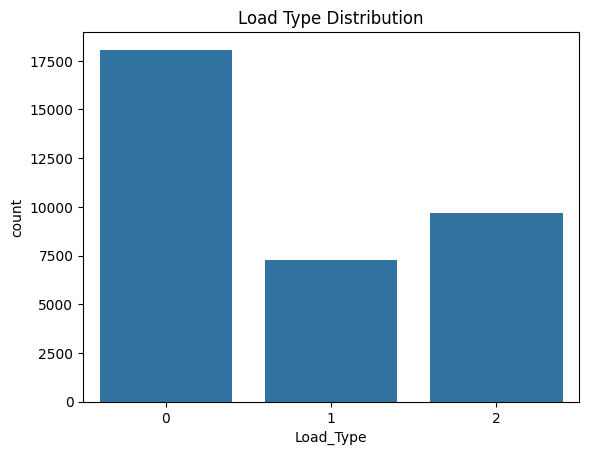

In [36]:
sns.countplot(x='Load_Type', data=df)
plt.title("Load Type Distribution")
plt.show()


##Coorelation Heatmap

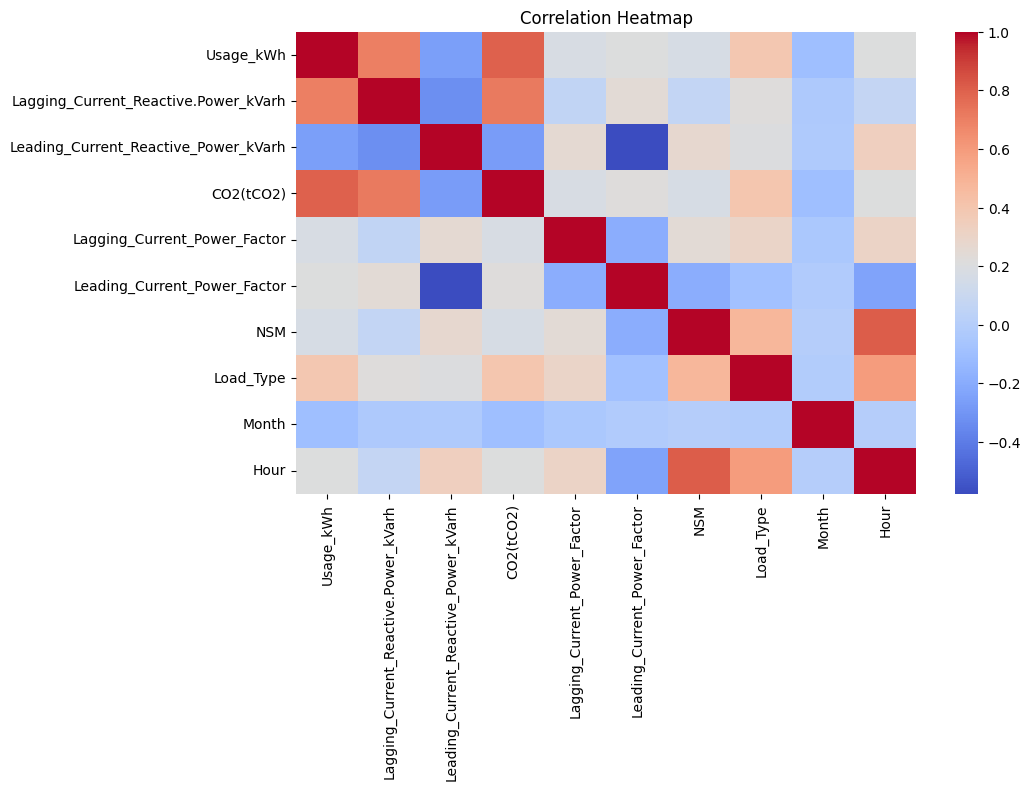

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [38]:
df = df.sort_values(by='Month')


In [39]:
train_df = df[df['Month'] < df['Month'].max()]
test_df  = df[df['Month'] == df['Month'].max()]

X_train = train_df.drop('Load_Type', axis=1)
y_train = train_df['Load_Type']

X_test = test_df.drop('Load_Type', axis=1)
y_test = test_df['Load_Type']


In [40]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Model (RandomForest)

In [41]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [42]:
y_pred = model.predict(X_test)


In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9355055424924421


##Report

In [45]:
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

  Light_Load       0.99      0.92      0.95      1745
Maximum_Load       0.88      0.95      0.91       528
 Medium_Load       0.87      0.98      0.92       704

    accuracy                           0.94      2977
   macro avg       0.91      0.95      0.93      2977
weighted avg       0.94      0.94      0.94      2977



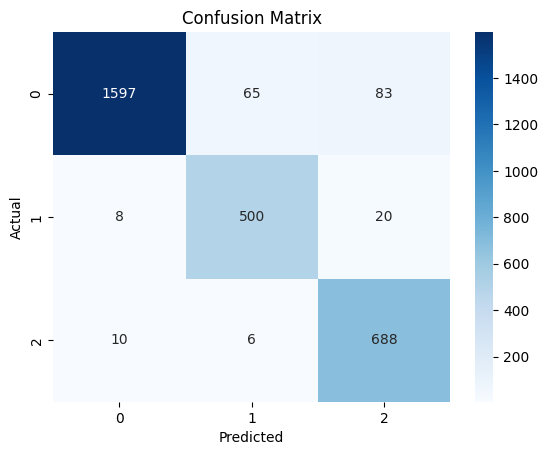

In [46]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


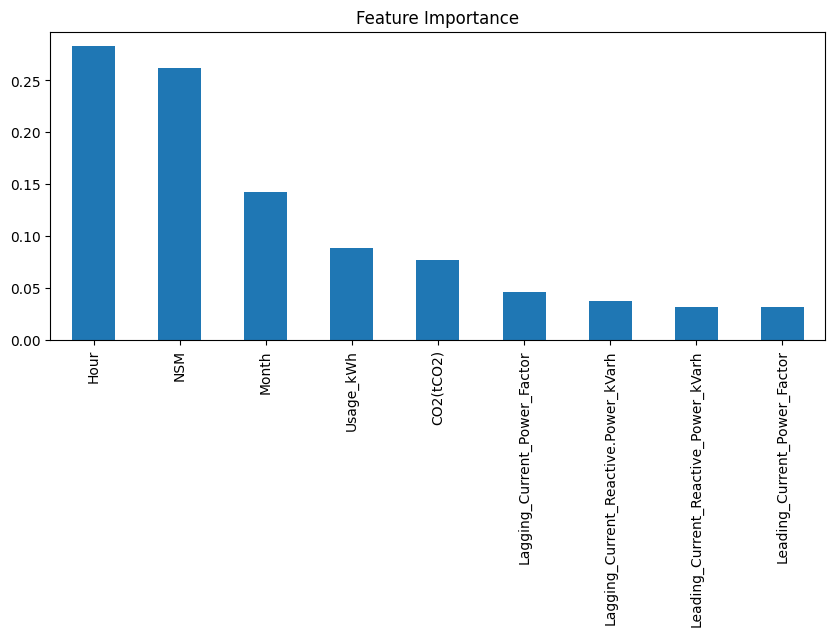

In [47]:
importance = pd.Series(
    model.feature_importances_,
    index=train_df.drop('Load_Type', axis=1).columns
).sort_values(ascending=False)

importance.plot(kind='bar', figsize=(10,4))
plt.title("Feature Importance")
plt.show()
